In [1]:
import re

import matplotlib.pyplot as plt
import nltk
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn as skl
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    roc_curve,
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from wordcloud import WordCloud
from gensim.models import KeyedVectors
import sys
sys.path.insert(1, "/home/m-joaopr/projetos/nlp/nlp/utils")

from preprocess import *

/home/m-joaopr/projetos/nlp/env/lib/python3.7/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers

2021-10-07 11:22:41.171314: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-07 11:22:41.171384: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
df_train = pd.read_csv(
    "/home/m-joaopr/projetos/nlp/nlp/data/tw_pt.csv"
)

In [4]:
df_train.head()

,Unnamed: 0,Text,Classificacao
0,0,���⛪ @ Catedral de Santo Antônio - Governador ...,Neutro
1,1,"� @ Governador Valadares, Minas Gerais https:/...",Neutro
2,2,"�� @ Governador Valadares, Minas Gerais https:...",Neutro
3,3,��� https://t.co/BnDsO34qK0,Neutro
4,4,��� PSOL vai questionar aumento de vereadores ...,Negativo


In [5]:
def encoder(df):
    df.replace(to_replace="Positivo",value =1, inplace=True)
    df.replace(to_replace="Negativo",value=-1,inplace=True)
    df.replace(to_replace="Neutro",value=0,inplace=True)

In [6]:
encoder(df_train['Classificacao'])

/home/m-joaopr/projetos/nlp/env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Classificacao', ylabel='count'>

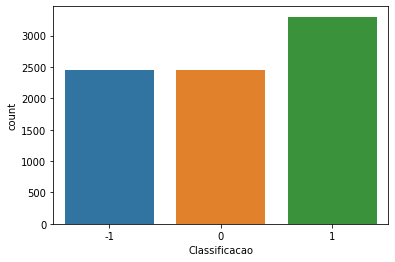

In [7]:
sns.countplot(df_train.Classificacao)

In [8]:
df_train.Classificacao.value_counts()

 1    3300
 0    2453
-1    2446
Name: Classificacao, dtype: int64

In [9]:
X = np.asarray([preprocess(text) for text in df_train.Text.tolist()])
target = np.asarray(df_train.Classificacao.tolist())

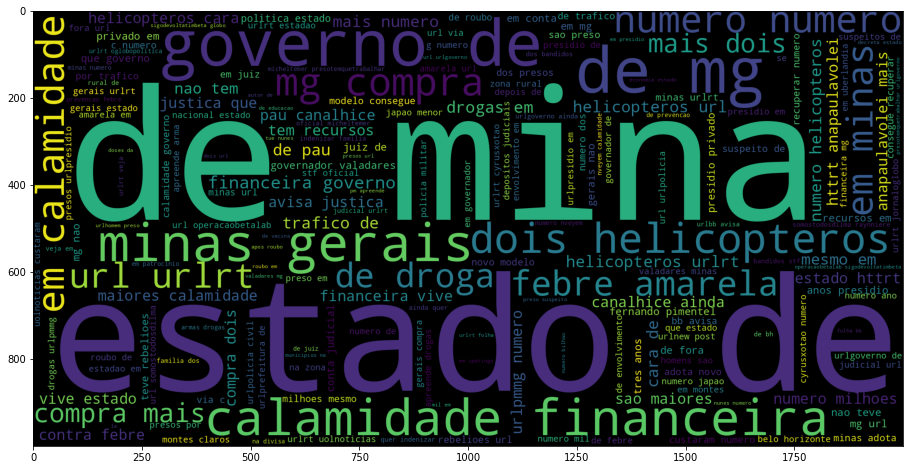

In [10]:
word_cloud = ""
for row in X:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width=2000,height=1000,background_color ='black',min_font_size = 10).generate(word_cloud)
plt.figure(figsize = (20,8))
plt.imshow(wordcloud)

# Model training

In [11]:
RANDOM_STATE = 2019

X_train, X_test, Y_train, Y_test = train_test_split(X, target, test_size=0.2,
                                                          random_state=RANDOM_STATE,
                                                          stratify=target)

In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1 
maxlen = len(max(X_train, key=len))

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# OHE

In [13]:
LabelBinarizer = skl.preprocessing.LabelBinarizer()
y_trainOHE = LabelBinarizer.fit_transform(Y_train)
y_testOHE = LabelBinarizer.transform(Y_test)
classesDataset = LabelBinarizer.classes_
print('Classes: ', classesDataset)

Classes:  [-1  0  1]


In [14]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers
import tensorflow as tf

In [15]:
model = Sequential()
embedding_layer = Embedding(input_dim=vocab_size,output_dim=3,input_length=maxlen)
model.add(embedding_layer)
model.add(Bidirectional(LSTM(32, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dense(20, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

2021-10-07 11:22:57.305166: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-10-07 11:22:57.305270: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-07 11:22:57.305322: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (localhost): /proc/driver/nvidia/version does not exist
2021-10-07 11:22:57.305907: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 29, 3)             18213     
_________________________________________________________________
bidirectional (Bidirectional (None, 29, 64)            9216      
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                1300      
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 63        
Total params: 28,792
Trainable params: 28,792
Non-trainable params: 0
____________________________________________________

In [16]:
model.fit(X_train,y_trainOHE,batch_size = 16,epochs = 100,validation_data = (X_test,y_testOHE),verbose = True)

2021-10-07 11:22:58.686753: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
410/410 [==============================] - 6s 9ms/step - loss: 0.4358 - accuracy: 0.6788 - val_loss: 0.1549 - val_accuracy: 0.9360
Epoch 2/100
410/410 [==============================] - 3s 8ms/step - loss: 0.1884 - accuracy: 0.9026 - val_loss: 0.0991 - val_accuracy: 0.9591
Epoch 3/100
410/410 [==============================] - 3s 7ms/step - loss: 0.1270 - accuracy: 0.9415 - val_loss: 0.1005 - val_accuracy: 0.9555
Epoch 4/100
410/410 [==============================] - 3s 7ms/step - loss: 0.0997 - accuracy: 0.9540 - val_loss: 0.0808 - val_accuracy: 0.9646
Epoch 5/100
410/410 [==============================] - 3s 7ms/step - loss: 0.0941 - accuracy: 0.9608 - val_loss: 0.1148 - val_accuracy: 0.9567
Epoch 6/100
410/410 [==============================] - 3s 7ms/step - loss: 0.0784 - accuracy: 0.9698 - val_loss: 0.1639 - val_accuracy: 0.9500
Epoch 7/100
410/410 [==============================] - 3s 7ms/step - loss: 0.0704 - accuracy: 0.9735 - val_loss: 0.0973 - val_accuracy: 0.9646

In [17]:
Y_pred = model.predict(X_test)

In [18]:
Y_pred=np.argmax(Y_pred,axis=1)
y_testOHE=np.argmax(y_testOHE,axis=1)

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
print(classification_report(y_testOHE, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       489
           1       0.92      0.92      0.92       491
           2       0.96      0.97      0.96       660

    accuracy                           0.95      1640
   macro avg       0.95      0.95      0.95      1640
weighted avg       0.95      0.95      0.95      1640



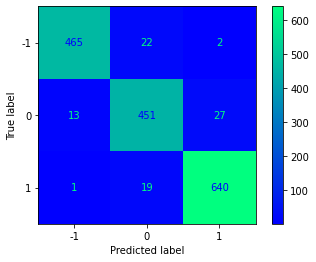

In [21]:
cm = confusion_matrix(y_testOHE, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classesDataset)
disp.plot(cmap=plt.cm.winter)
plt.grid(False)
plt.show()

In [22]:
model.save('/home/m-joaopr/projetos/nlp/nlp/saved_model/keras')

2021-10-07 11:28:29.048972: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /home/m-joaopr/projetos/nlp/nlp/saved_model/keras/assets


INFO:tensorflow:Assets written to: /home/m-joaopr/projetos/nlp/nlp/saved_model/keras/assets


In [23]:
model = keras.models.load_model('/home/m-joaopr/projetos/nlp/nlp/saved_model/keras')

# Model Test

In [24]:
frases = np.asarray(['Mochila maravilhosa, linda de boa qualidade. Muito satisfeita, obrigada',
          'Produto de qualidade com um precinho camarada já comprei mais de uma vez e pretendo comprar novamente',
          'Boa noite ele atende as minhas expectativas só que ele deveria ter mais potencia',
          'Embora pequeno, tem uma boa ventilação e é relativamente silencioso. Muito bom produto, recomendo',
          'Bom gostei muito, achei que pelo preço e ótimo',
          'Produto de baixíssima qualidade. Parece "resto" de produção. Já tive outros da mesma marca, que comprei diretamente na china, mas este foi o pior que já comprei.',
          'Muito ruim, lado esquerdo não funciona. Volume do lado direito muito baixo, não gostei. Joguei meu dinheiro fora.',
          'Produto usado, com lista de contatos e tudo. Que absurdo, vender um produto que custou quase 2 mil reais usado. Falta de respeito com o cliente. Nem se preocuparam em apagar os registros de uso.',
          'Arrependimento total, o celular não tira foto pela câmera do whats o sensor é ruim, só vim vê o negócio da câmera agora, se não já tinha devolvido o celular.',
          'Bateria não dura nem meio dia trava e apaga do nada produto pirateado nunca que é primeira linha paguei caro e não tenho telefone confiável.'])

X = np.asarray([preprocess(text) for text in frases])

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)

vocab_size = len(tokenizer.word_index) + 1 
maxlen = len(max(X, key=len))

X = pad_sequences(X, padding='post', maxlen=maxlen)

target = np.asarray([1,1,1,1,1,-1,-1,-1,-1,-1])

In [25]:
LabelBinarizer = skl.preprocessing.LabelBinarizer()
y_trainOHE = LabelBinarizer.fit_transform(target)
y_testOHE = LabelBinarizer.transform(target)
classesDataset = LabelBinarizer.classes_
print('Classes: ', classesDataset)

Classes:  [-1  1]


In [26]:
Y_pred = model.predict(X)

In [27]:
Y_pred

array([[1.6814003e-05, 9.9992925e-01, 4.2428153e-05],
       [6.9438281e-33, 1.5686647e-32, 1.0000000e+00],
       [9.1026718e-31, 5.7291507e-30, 1.0000000e+00],
       [2.1172107e-05, 8.3675003e-01, 6.7000389e-03],
       [8.4971290e-08, 9.9999940e-01, 4.8973345e-07],
       [1.9089878e-03, 4.4785000e-12, 4.9009919e-04],
       [1.0000000e+00, 1.4710017e-09, 3.0708015e-19],
       [3.8105029e-22, 5.9837078e-21, 1.0000000e+00],
       [1.0000000e+00, 9.1723790e-10, 1.1762093e-14],
       [2.6439464e-01, 6.1220652e-01, 1.7284963e-01]], dtype=float32)

In [28]:
Y_pred=np.argmax(Y_pred,axis=1)

In [29]:
Y_pred

array([1, 2, 2, 1, 1, 0, 0, 2, 0, 1])

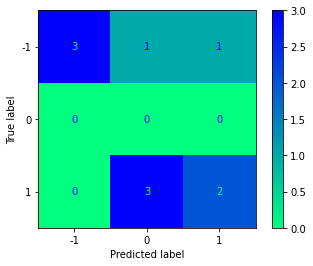

In [30]:
y_pred=model.predict(X) 
y_pred=np.argmax(y_pred,axis=1)
y_pred = preprocessing.minmax_scale(y_pred, feature_range=(-1,1)).astype(int)
labels = [-1, 0, 1]

cm = confusion_matrix(target, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.winter_r)
plt.grid(False)
plt.show()